# Home Assignment No. 3: Part 1 

In this part of the homework you are to solve several problems related to machine learning algorithms.
* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**.
* Your solution must me **COMPLETE**, i.e. contain all required formulas/proofs/detailed explanations.
* You must write your solution for any problem just right after the words **BEGIN SOLUTION**. Attaching pictures of your handwriting is allowed, but **highly discouraged**.
* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of our yown code. There exists a class/method for almost everything you can imagine (related to this homework).
* To do some tasks in this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.
* In some problems you may be asked to provide short discussion of the results. In this cases you have to create **MARKDOWN** cell with your comments right after the your code cell.
* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute `Kernel` -> `Restart Kernel and Run All Cells`, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.
* The are problems with \* mark - they are not obligatory. You can get **EXTRA POINTS** for solving them.
## $\LaTeX$ in Jupyter
Jupyter has constantly improving $\LaTeX$ support. Below are the basic methods to
write **neat, tidy, and well typeset** equations in your notebooks:
* to write an **inline** equation use 
```markdown
$ you latex equation here $
```
* to write an equation, that is **displayed on a separate line** use 
```markdown
$$ you latex equation here $$
```
* to write a **block of equations** use 
```markdown
\begin{align}
    left-hand-side
        &= right-hand-side on line 1
        \\
        &= right-hand-side on line 2
        \\
        &= right-hand-side on the last line
\end{align}
```
The **ampersand** (`&`) aligns the equations horizontally and the **double backslash**
(`\\`) creates a new line.

Write your theoretical derivations within such blocks:
```markdown
**BEGIN Solution**

<!-- >>> your derivation here <<< -->

**END Solution**
```

Please, write your implementation within the designated blocks:
```python
...
### BEGIN Solution

# >>> your solution here <<<

### END Solution
...
```


<br>

In [ ]:
import numpy as np
import pandas as pd

import torch

%matplotlib inline
import matplotlib.pyplot as plt

<br>

# Bayesian Models. GLM

## Task 1 (1 pt.)

Consider a univariate Gaussian distribution $\mathcal{N}(x; \mu, \tau^{-1})$.
Let's define Gaussian-Gamma prior for parameters $(\mu, \tau)$:

\begin{equation}
    p(\mu, \tau)
        = \mathcal{N}(\mu; \mu_0, (\beta \tau)^{-1})
            \otimes \text{Gamma}(\tau; a, b)
        \,.
\end{equation}

Find the posterior distribution of $(\mu, \tau)$ after observing $X = (x_1, \dots, x_n)$.

**BEGIN Solution**<br>
Let's consider given Gaussian-Gamma distribution $p(\mu, \tau) = \mathcal{N}(\mu; \mu_0, (\beta \tau)^{-1}) \otimes \text{Gamma}(\tau; a, b)$, where

$$
    \text{Gamma}(\tau; a, b) = \dfrac{b^{a}}{\Gamma(a)}\tau^{a - 1}\exp(-\tau b)
$$

$$
    N(\mu; \mu_{0},(\beta \tau)^{-1}) = \dfrac{1}{(2\pi (\beta \tau)^{-1})^{\frac{1}{2}}}\exp\big(-\dfrac{1}{2(\beta \tau)^{-1}}(\mu - \mu_{0})^{2}\big)
$$
So,
$$
    p(\mu, \tau) = \mathcal{N}(\mu; \mu_0, (\beta \tau)^{-1}) \otimes \text{Gamma}(\tau; a, b) = \dfrac{b^{a}}{\Gamma(a)}\tau^{a - \frac{1}{2}} \dfrac{\beta^{\frac{1}{2}}}{(2\pi)^{\frac{1}{2}}} \exp(-\tau b) \exp\big(-\dfrac{1}{2(\beta \tau)^{-1}}(\mu - \mu_{0})^{2}\big)
$$

For posterior distribution we have posterior ~ likelihood $\times$ prior

$$
    p(\mu, \tau \vert X) \sim p(X \vert \mu, \tau)p(\mu, \tau) \space \space \space \text{(posterior ~ likelihood $\times$ prior)}
$$

Likelihood is given by
$$
    p(X \vert \mu, \tau) = \prod_{i = 1}^{n} \mathcal{N}(X \vert \mu, \tau^{-1}) = \dfrac{1}{(2\pi)^{\frac{n}{2}}}\tau^{\frac{n}{2}}\exp\big(-\dfrac{\tau}{2}\sum_{i = 1}^{n}(x_{i} - \mu)^{2}\big)
$$

Using notation $\bar{x} = \dfrac{\sum_{i = 1}^{n}x_{i}}{n}$, we will have

$$
    p(\mu, \tau \vert X) \sim \dfrac{b^{a}}{\Gamma(a)}\tau^{a - \frac{1}{2}} \dfrac{\beta^{\frac{1}{2}}}{(2\pi)^{\frac{1}{2}}} \exp(-\tau b) \exp\big(-\dfrac{1}{2(\beta \tau)^{-1}}(\mu - \mu_{0})^{2}\big) \dfrac{1}{(2\pi)^{\frac{n}{2}}}\tau^{\frac{n}{2}}\exp\big(-\dfrac{\tau}{2}\sum_{i = 1}^{n}(x_{i} - \mu)^{2}\big)
$$

$$
    p(\mu, \tau \vert X) \sim \dfrac{b^{a}}{\Gamma(a)}\tau^{a - \frac{1}{2}} \dfrac{\beta^{\frac{1}{2}}}{(2\pi)^{\frac{1}{2}}} \dfrac{1}{(2\pi)^{\frac{n}{2}}}\tau^{\frac{n}{2}} \exp(-\tau b)\exp\big(-\dfrac{1}{2(\beta \tau)^{-1}}(\mu - \mu_{0})^{2}\big) \exp\big(-\dfrac{\tau}{2}\sum_{i = 1}^{n}(x_{i} - \mu)^{2}\big)
$$

$$
    p(\mu, \tau \vert X) \sim \dfrac{b^{a}}{\Gamma(a)}\tau^{\frac{n}{2} + a - \frac{1}{2}} \dfrac{\beta^{\frac{1}{2}}}{(2\pi)^{\big(\frac{1}{2} + \frac{n}{2}\big)}} \exp(-\tau b)\exp\big(-\dfrac{\beta \tau}{2}(\mu - \mu_{0})^{2}\big) \exp\big(-\dfrac{\tau}{2}\big(n(\mu - \bar{x})^{2} + \sum_{i = 1}^{n}(x_{i} - x)^{2}\big)\big)
$$

$$
    p(\mu, \tau \vert X) \sim \dfrac{b^{a}}{\Gamma(a)}\tau^{\frac{n}{2} + a - \frac{1}{2}} \dfrac{\beta^{\frac{1}{2}}}{(2\pi)^{\big(\frac{1}{2} + \frac{n}{2}\big)}} \exp(-\tau b)\exp\big(\dfrac{\tau}{2}\big(\beta(\mu - \mu_{0})^{2} +n(\mu - \bar{x})^{2} + \sum_{i = 1}^{n}(x_{i} - x)^{2}\big)\big)
$$

$$
    p(\mu, \tau \vert X) \sim \dfrac{b^{a}}{\Gamma(a)}\tau^{\frac{n}{2} + a - \frac{1}{2}} \dfrac{\beta^{\frac{1}{2}}}{(2\pi)^{\big(\frac{1}{2} + \frac{n}{2}\big)}} \exp(-\tau b)\exp\big(\dfrac{\tau}{2}\big( (\beta + n)\big(\mu - \dfrac{\beta \mu_{0} + n\bar{x}}{\beta + n}\big)^{2} + \dfrac{\beta n (\bar{x} - \mu_{0})^{2}}{\beta + n} + \sum_{i = 1}^{n}(x_{i} - x)^{2}\big)\big)
$$

So posterior distribution is expressed as,

$$
    p(\mu, \tau \vert X) \sim \mathcal{N}\big(\mu; \dfrac{\beta \mu_{0} + n\bar{x}}{\beta + n}, ((\beta + n)\tau)^{-1}\big) \otimes \text{Gamma}\big(\tau; a + \dfrac{n}{2}, b + \dfrac{\beta n (\bar{x} - \mu_{0})^{2}}{2(\beta + n)} + \dfrac{1}{2}\sum_{i = 1}^{n}(x_{i} - x)^{2}\big)
$$

**END Solution**

<br>

## Task 2 (1 + 1 + 1 = 3 pt.)

Evaluate the following integral using the Laplace approximation:
\begin{equation}
    x \mapsto \int \sigma(w^T x) \mathcal{N}(w; 0, \Sigma) dw \,,
\end{equation}
for $x = \bigl(\tfrac23, \tfrac16, \tfrac16\bigr)\in \mathbb{R}^3$ and 
\begin{equation}
    \Sigma
        = \begin{pmatrix}
             1    & -0.25 & 0.75 \\
            -0.25 &  1    & 0.5  \\
             0.75 &  0.5  & 2
           \end{pmatrix}
        \,.
\end{equation}

### Task 2.1 (1 pt.)
Use the Hessian matrix computed numericaly via finite differences. (Check out [Numdifftools](https://pypi.python.org/pypi/Numdifftools))

In [ ]:
import numdifftools as nd
from scipy.optimize import minimize
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

### We will use Laplace approximation as described by Bishop in "Pattern Recognition and Machine Learning", chapter 4.4

In [ ]:
### BEGIN Solution

def dfunc(w):
    x = np.array([2/3, 1/6, 1/6])
    cov_matrix = np.array([[1.0, -0.25, 0.75], [-0.25, 1.0, 0.5], [0.75, 0.5, 2.0]])
    w = w.astype(dtype = np.float64)
    
    sigma = 1 / (1 + np.exp(-w.T @ x))
    gaussian_distr = (1 / (2 * np.pi)**(3/2)) * (1 / (np.linalg.det(cov_matrix))**(1/2)) *  np.exp(-0.5 * w.T @ np.linalg.inv(cov_matrix) @ w)
    
    return sigma * gaussian_distr

def minus_ln_dfunc(w):
    return -np.log(dfunc(w))

### END Solution

In [ ]:
#x = np.array([2/3, 1/6, 1/6])
#cov_matrix = np.array([[1, -0.25, 0.75], [-0.25, 1, 0.5], [0.75, 0.5, 2]])

w_init = np.array([0.1, 0.3, 0.4])
w_optimal = minimize(minus_ln_dfunc, x0=w_init).x

H = nd.Hessian(minus_ln_dfunc)(w_optimal)

norm_integral = dfunc(w_optimal) * (2 * np.pi)**(3/2) / (np.linalg.det(H))**(1/2)

print ("The value of integral: ", norm_integral)

<br>

### Task 2.2 (1 pt.)
Use the diagonal approximation of the Hessian computed by autodifferentiation
in **pytorch**.

In [ ]:
import torch
from torch.autograd import Variable, grad

In [ ]:
### BEGIN Solution

def dfunc_torch(w):
    
    x = np.array([2/3, 1/6, 1/6])
    x = Variable(torch.from_numpy(x).type(torch.FloatTensor))
    cov_matrix = np.array([[1.0, -0.25, 0.75], [-0.25, 1.0, 0.5], [0.75, 0.5, 2.0]])
    
    inv_cov_matr = Variable(torch.from_numpy(np.linalg.inv(cov_matrix)).type(torch.FloatTensor))
    gauss_distr = (1/((2*np.pi)**(3/2)*np.linalg.det(cov_matrix)**(1/2))) * torch.exp(-0.5 * w @ inv_cov_matr @ w)
    
    return gauss_distr * torch.sigmoid(torch.dot(w, x))
    
def minus_ln_dfunc_torch(w):
    return -torch.log(dfunc_torch(w))

def hessian_diag_approx(f, w):
    z = Variable(torch.FloatTensor(w), requires_grad=True)
    dim = z.size()[0]
    
    y = f(z)
    first_grad = torch.autograd.grad(y, z, create_graph=True)[0]
        
    hessian = []
    for i in range (dim):
        hessian.append(torch.autograd.grad(first_grad[i], z, create_graph=True)[0].data.numpy())
    
    return np.diag(np.diag(hessian))


### END Solution

In [ ]:
H = hessian_diag_approx(minus_ln_dfunc_torch, w_optimal)

torch_norm_integral = dfunc_torch(Variable(torch.from_numpy(w_optimal).type(torch.FloatTensor))) * (2*np.pi)**(3/2) / np.linalg.det(H)**(1/2)
torch_norm_integral = torch_norm_integral.data.numpy()

print('The value of integral: ', torch_norm_integral)

<br>

### Task 2.3 (1 pt.)

Compare the results comparing the `absolute errors` of the results (this is possible with Monte-Carlo estimate of the integral). Write 1-2 sentences in the results discussion.

In [ ]:
### BEGIN Solution

### END Solution

**BEGIN Solution**

**END Solution**

<br>

# Gaussian Processes

## Task 3 (1 + 2 = 3 pt.)

### Task 3.1 (1 pt.)

Assuimng the matrices $A \in \mathbb{R}^{n \times n}$ and $D \in \mathbb{R}^{d \times d}$
are invertible, using **gaussian elimination** find the inverse matrix for the following
block matrix:
\begin{equation}
    \begin{pmatrix} A & B \\ C & D \end{pmatrix} \,,
\end{equation}
where $C \in \mathbb{R}^{d \times n}$ and $B \in \mathbb{R}^{n \times d}$.

**BEGIN Solution**

**END Solution**

<br>

### Task 3.2 (2 pt.)

Assume that the function $y(x)$, $x \in \mathbb{R}^d$, is a realization of the Gaussian
Process $GP\bigl(0; K(\cdot, \cdot)\bigr)$ with $K(a, b) = \exp({- \gamma \|a - b\|_2^2}))$.

Suppose two datasets were observed: **noiseless** ${D_0}$ and **noisy** ${D_1}$
\begin{aligned}
    & D_0 = \bigl(x_i, y(x_i) \bigr)_{i=1}^{n} \,, \\
    & D_1 = \bigl(x^\prime_i, y(x^\prime_i) + \varepsilon_i \bigr)_{i=1}^{m} \,,
\end{aligned}
where $\varepsilon_i \sim \text{ iid } \mathcal{N}(0, \sigma^2)$, independent of process $y$.

Derive the conditional distribution of $y(x) \big\vert_{D_0, D_1}$ at a new $x$.

**BEGIN Solution**

**END Solution**

<br>

## Task 4 (1 + 2 = 3 pt.)

### Task 4.1 (1 pt.)

> In the late 1950’s Charles Keeling invented an accurate way to measure atmospheric $CO_2$ concentration and began taking regular measurements at the Mauna Loa observatory.


Take `monthly_co2_mlo.csv` file, load it and prepare the data.

0. Load the `CO2 [ppm]` time series
1. Replace $-99.99$ with **NaN** and drop the missing observations
2. Split the time series into train and test
3. Normalize the target value by fitting a transformation on the train
4. Plot the resulting target against the time index

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [79]:
### BEGIN Solution

dt = pd.read_csv('data/monthly_co2_mlo.csv')
dt.head()

### END Solution

,year,CO2 [ppm],seasonally adjusted [ppm],fit [ppm],seasonally adjusted fit [ppm],CO2 filled [ppm],seasonally adjusted filled [ppm]
0,1958.000000,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
1,1958.083333,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
2,1958.166667,315.70,314.43,316.19,314.90,315.70,314.43
3,1958.250000,317.45,315.15,317.30,314.98,317.45,315.15
4,1958.333333,317.51,314.72,317.85,315.06,317.51,314.72


In [80]:
dt[dt==-99.99]=np.nan
dt = dt.dropna()
dt.head()

,year,CO2 [ppm],seasonally adjusted [ppm],fit [ppm],seasonally adjusted fit [ppm],CO2 filled [ppm],seasonally adjusted filled [ppm]
2,1958.166667,315.70,314.43,316.19,314.90,315.70,314.43
3,1958.250000,317.45,315.15,317.30,314.98,317.45,315.15
4,1958.333333,317.51,314.72,317.85,315.06,317.51,314.72
6,1958.500000,315.86,315.18,315.87,315.22,315.86,315.18
7,1958.583333,314.93,316.18,314.00,315.29,314.93,316.18


In [81]:
X = dt['year']
y = dt['CO2 [ppm]']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [83]:
scaler = StandardScaler()
y_train_sc = scaler.fit_transform(y_train.values.reshape(-1,1), X_train.values.reshape(-1,1))
y_test_sc = scaler.transform(y_test.values.reshape(-1, 1))

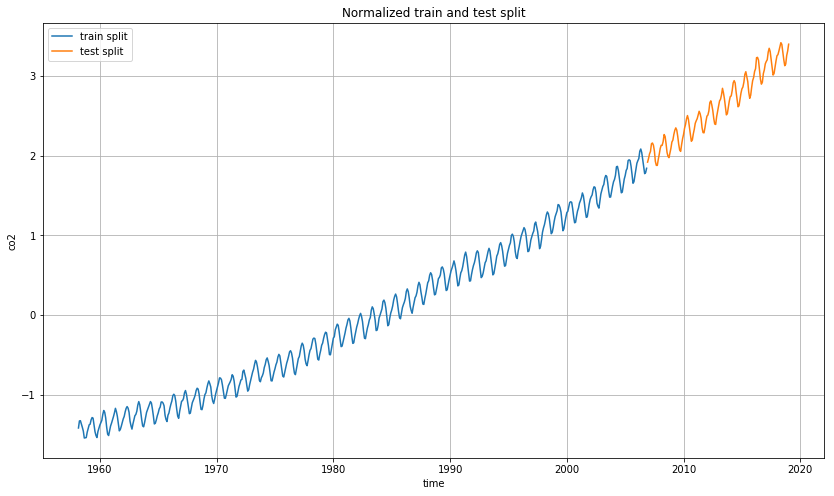

In [91]:
fig = plt.figure(figsize=(14, 8))
plt.plot(X_train, y_train_sc, label="train split")
plt.plot(X_test, y_test_sc, label="test split")
plt.xlabel('time')
plt.ylabel('co2')
plt.title("Normalized train and test split")
plt.legend(loc = "upper left")
plt.grid()
plt.show()

<br>

### Task 4.2 (2 pt.)

Use [**GPy**](https://pypi.python.org/pypi/GPy) library for training and prediction. Fit a GP and run the predict on the test. Useful kernels to combine: `GPy.kern.RBF, GPy.kern.Poly, GPy.kern.StdPeriodic, GPy.kern.White, GPy.kern.Linear`. 

1. Plot mean and confidence interval of the prediction. 
2. Inspect them on normality by scatter plot: plot predicted points/time series against true values. 
3. Estimate the prediction error with `r2_score`. R2-score accepted > 0.83 on test sample.

In [ ]:
from GPy.models import GPRegression
from GPy.kern import RBF, Poly, StdPeriodic, White, Linear
from sklearn.metrics import r2_score

In [ ]:
### BEGIN Solution

### END Solution

In [ ]:
# >>> your code here <<<

In [ ]:
r2_score(# >>> your code here <<<)